In [1]:
import pandas as pd  #pandas to load datasets
import numpy as np  #numpy for linear algebra
import matplotlib.pyplot as plt  #matplotlib for making plots
import seaborn as sns  #seaborn for making plots

In [2]:
!unzip /content/netflix_titles.csv.zip

Archive:  /content/netflix_titles.csv.zip
  inflating: netflix_titles.csv      


In [3]:
netflix_dataset = pd.read_csv("/content/netflix_titles.csv")
netflix_dataset.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [4]:
netflix_dataset.count()

show_id         6234
type            6234
title           6234
director        4265
cast            5664
country         5758
date_added      6223
release_year    6234
rating          6224
duration        6234
listed_in       6234
description     6234
dtype: int64

In [5]:
fill_netflix_dataset = netflix_dataset.fillna(' ')
fill_netflix_dataset.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


<h1>Term Frequency(TF) and Inverse Document Frequency(IDF)¶


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [7]:
#Removing stop words 
tf_idf = TfidfVectorizer(stop_words='english')

#Constructing TF-IDF matrix by transforming and fitting the data
tf_idf_matrix = tf_idf.fit_transform(fill_netflix_dataset['description'])

# shape of tf_idf_matrix
tf_idf_matrix.shape

(6234, 16151)

<h1>Cosine Similarity

In [10]:
from sklearn.metrics.pairwise import linear_kernel

In [11]:
# calculating the Cosine Similarity Score

cosine_sim_score = linear_kernel(tf_idf_matrix, tf_idf_matrix)

In [15]:
cosine_sim_score.shape

(6234, 6234)

In [33]:
netflix_index = netflix_dataset.index
titles = netflix_dataset['title']
indices = pd.Series(netflix_index, index = titles).drop_duplicates()
indices

title
Norm of the North: King Sized Adventure           0
Jandino: Whatever it Takes                        1
Transformers Prime                                2
Transformers: Robots in Disguise                  3
#realityhigh                                      4
                                               ... 
Red vs. Blue                                   6229
Maron                                          6230
Little Baby Bum: Nursery Rhyme Friends         6231
A Young Doctor's Notebook and Other Stories    6232
Friends                                        6233
Length: 6234, dtype: int64

In [50]:
def get_recommendations(title, cosine_sim = cosine_sim_score):
    
    idx = indices[title]
    
    # Get the pairwise similarity scores of all movies with that movies
    sim_scores = list(enumerate(cosine_sim_score[idx]))
    
    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key = lambda x: x[1], reverse = True)
    
    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]
    
    # Get the Movie indices
    movie_indices = [i[0] for i in sim_scores]
    
    # Return the top 10 Similar movies
    return netflix_dataset['title'].iloc[movie_indices]

In [51]:
get_recommendations('Mortel')

3016                  PILI Fantasy: War of Dragons
5688         Edgar Rice Burroughs' Tarzan and Jane
4401                             Figures of Speech
2001                                     FirstBorn
3310    My Entire High School Sinking Into the Sea
5307                                 Psychokinesis
4332                                At First Light
3955                          The Umbrella Academy
1761                                     Chamatkar
5421                              Maharakshak Devi
Name: title, dtype: object

In [52]:
get_recommendations('PK')

2533                    Unbroken
3623       Merku Thodarchi Malai
2738              Jhansi Ki Rani
866     Harishchandrachi Factory
4572                        ROMA
861           Ek Main Aur Ekk Tu
4970     Bhavesh Joshi Superhero
2416       Servant of the People
1514                    Stranger
1700                   Behzat Ç.
Name: title, dtype: object

<h1>Preprocess Data


In [53]:
def clean_data(x):
    return str.lower(x.replace(' ', ''))

In [54]:
features = ['title', 'director', 'cast', 'listed_in', 'description']
fill_netflix_dataset = fill_netflix_dataset[features]

In [56]:
for feature in features:
    fill_netflix_dataset[feature] = fill_netflix_dataset[feature].apply(clean_data)
    
fill_netflix_dataset.head(2)

,title,director,cast,listed_in,description
0,normofthenorth:kingsizedadventure,"richardfinn,timmaltby","alanmarriott,andrewtoth,briandobson,colehoward...","children&familymovies,comedies",beforeplanninganawesomeweddingforhisgrandfathe...
1,jandino:whateverittakes,,jandinoasporaat,stand-upcomedy,jandinoasporaatriffsonthechallengesofraisingki...


In [57]:
def create_soup(x):
    return x['title'] + ' ' + x['director'] + ' ' + x['cast'] + ' ' + x['listed_in'] +' ' + x['description']

In [58]:
fill_netflix_dataset['soup'] = fill_netflix_dataset.apply(create_soup, axis = 1)

In [59]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(fill_netflix_dataset['soup'])

cosine_sim_score2 = cosine_similarity(count_matrix, count_matrix)

In [60]:
fill_netflix_dataset = fill_netflix_dataset.reset_index()
indices = pd.Series(fill_netflix_dataset.index, index = fill_netflix_dataset['title'])

In [61]:
def updated_recommendations(title, cosine_sim = cosine_sim_score2):
    
    title = title.replace(' ', '').lower()
    idx = indices[title]
    
    # Get the pairwise similarity scores of all movies with that movies
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key = lambda x: x[1], reverse = True)
    
    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]
    
    # Get the Movie indices
    movie_indices = [i[0] for i in sim_scores]
    
    # Return the top 10 Similar movies
    return netflix_dataset['title'].iloc[movie_indices]

In [62]:
updated_recommendations('PK')

5054                           3 Idiots
5494       The Legend of Michael Mishra
3093                  Anthony Kaun Hai?
2196                             Haapus
691                               Sanju
4110                   Taare Zameen Par
1449                    Chance Pe Dance
2194                    Chal Dhar Pakad
1746    EMI: Liya Hai To Chukana Padega
4920                   Khosla Ka Ghosla
Name: title, dtype: object

<h1> visualization

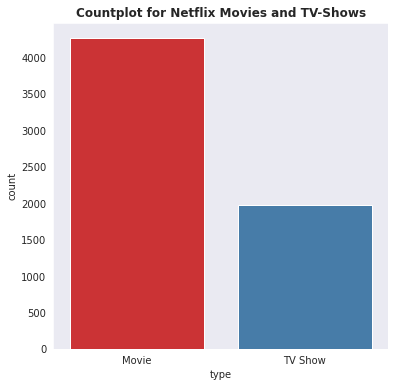

In [63]:
sns.set_style('dark')
ax = plt.subplots(figsize = (6, 6))
plt.title('Countplot for Netflix Movies and TV-Shows', fontweight='bold')
ax = sns.countplot(x = 'type', data=netflix_dataset, palette='Set1')

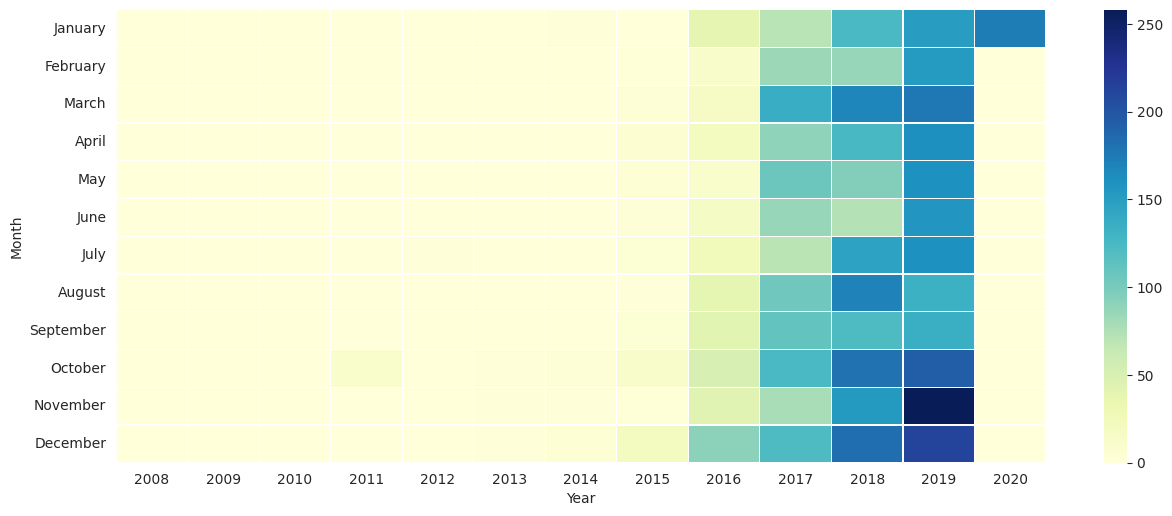

In [64]:
net_date = netflix_dataset[['date_added']].dropna()

net_date['Year'] = net_date.date_added.apply(lambda y : y.split(' ')[-1])
net_date['Month'] = net_date.date_added.apply(lambda y : y.split(' ')[0])

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df = net_date.groupby('Year')['Month'].value_counts().unstack().fillna(0)[month_order].T


ax = plt.subplots(figsize = (15, 6), dpi=100)
ax = sns.heatmap(df, cmap="YlGnBu", linewidths=.1)

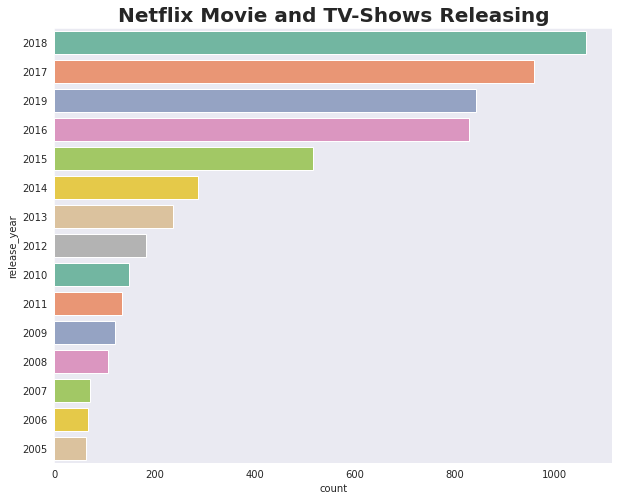

In [65]:
ax = plt.subplots(figsize = (10, 8))
sns.set_style('dark')
plt.title('Netflix Movie and TV-Shows Releasing', fontweight='bold', fontsize=20)
ax = sns.countplot(y = 'release_year', data = netflix_dataset, order = netflix_dataset['release_year'].value_counts().index[0:15], palette='Set2')

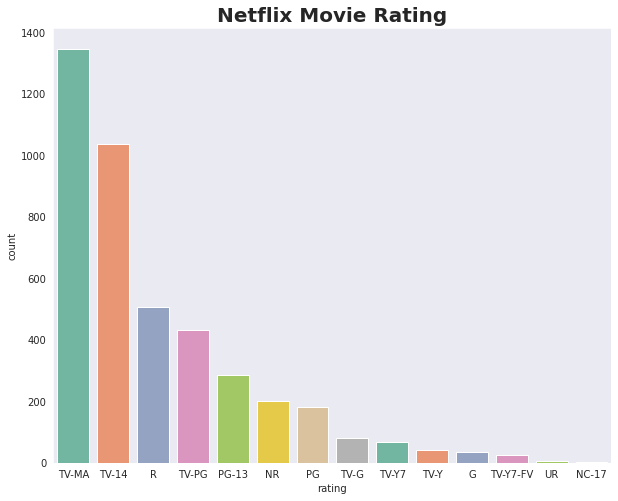

In [67]:
netflix_movies = netflix_dataset[netflix_dataset['type'] == 'Movie']
netflix_movies.head()

netflix_tvshows = netflix_dataset[netflix_dataset['type'] == 'TV Show']
netflix_tvshows.head()

ax = plt.subplots(figsize = (10, 8))
sns.set_style('dark')
plt.title('Netflix Movie Rating', fontweight='bold', fontsize=20)
ax = sns.countplot(x = 'rating', data = netflix_movies, palette = 'Set2', order = netflix_movies['rating'].value_counts().index[0:15])

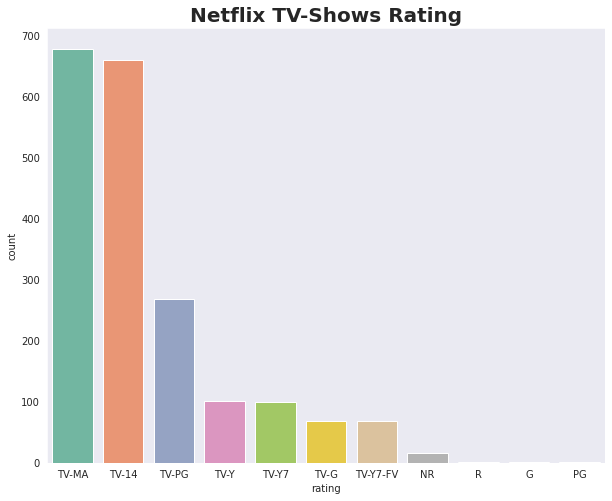

In [68]:
ax = plt.subplots(figsize = (10, 8))
sns.set_style('dark')
plt.title('Netflix TV-Shows Rating', fontweight = 'bold', fontsize=20)
ax = sns.countplot(x = 'rating', data = netflix_tvshows, palette='Set2', order = netflix_tvshows['rating'].value_counts().index[0:15])

In [69]:
# More movies content creating countries

countries = {}
netflix_movies['country'] = netflix_movies['country'].fillna('Unknown')

list_countries = list(netflix_movies['country'])

for i in list_countries:
    i = list(i.split(','))
    
    if len(i) is 1:
        if i in list(countries.keys()):
            countries[i] += 1
        else:
            countries[i[0]] = 1
    else:
        for j in i:
            if j in list(countries.keys()):
                countries[j] += 1
            else:
                countries[j] = 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [70]:
final_countries = {}

for country, no in countries.items():
    country = country.replace(' ','')
    
    if country in list(final_countries.keys()):
        final_countries[country] += no
    else:
        final_countries[country] = no
        
final_countries = {k : v for k, v in sorted(final_countries.items(), key = lambda item : item[1], reverse = True)}

Text(0, 0.5, 'Arrival delays (in minutes)')

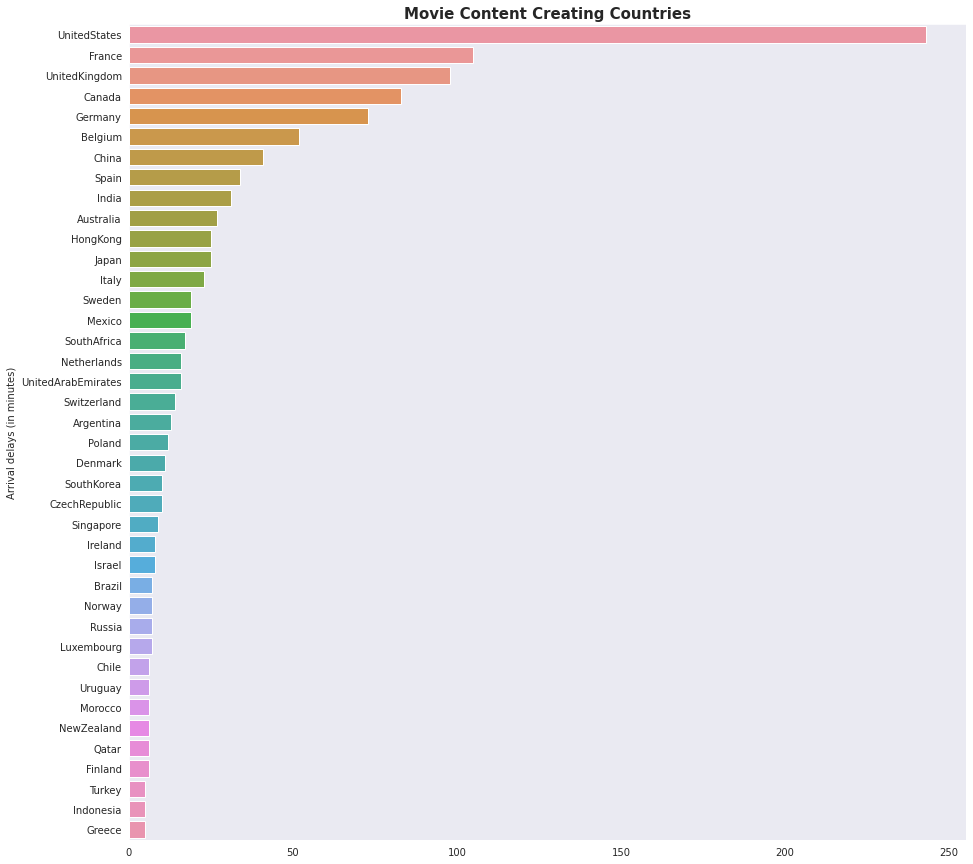

In [71]:
plt.figure(figsize = (15, 15))
plt.title('Movie Content Creating Countries', fontweight = 'bold', fontsize=15)

y_ver = list(final_countries.keys())
x_hor = list(final_countries.values())
sns.barplot( y = y_ver[0:40], x = x_hor[0:40])
plt.ylabel('Arrival delays (in minutes)')

<h1> world cloud 

In [72]:
from collections import Counter
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [73]:
genres = list(netflix_movies['listed_in'])
gen = []

for i in genres:
    i = list(i.split(','))
    
    for j in i:
        gen.append(j.replace(' ',''))

g = Counter(gen)

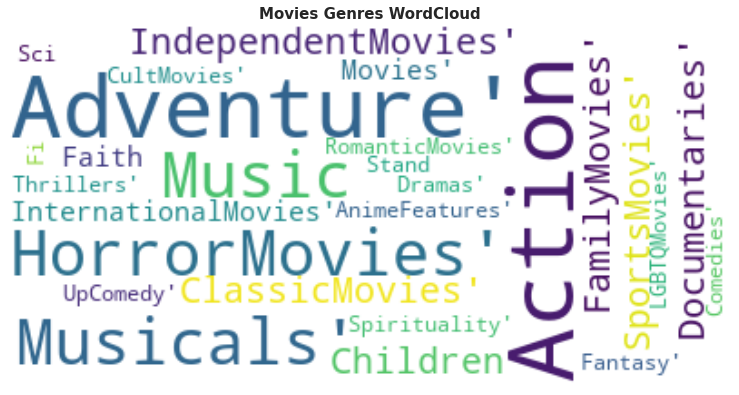

In [74]:
text = list(set(gen))
plt.rcParams['figure.figsize'] = (13, 13)
wordcloud = WordCloud(max_font_size = 50, max_words = 100, background_color =  'white').generate(str(text))

plt.title('Movies Genres WordCloud', fontweight = 'bold', fontsize=15)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [75]:
genres = list(netflix_tvshows['listed_in'])
gen = []

for i in genres:
    i = list(i.split(','))
    
    for j in i:
        gen.append(j.replace(' ',''))

g=Counter(gen)

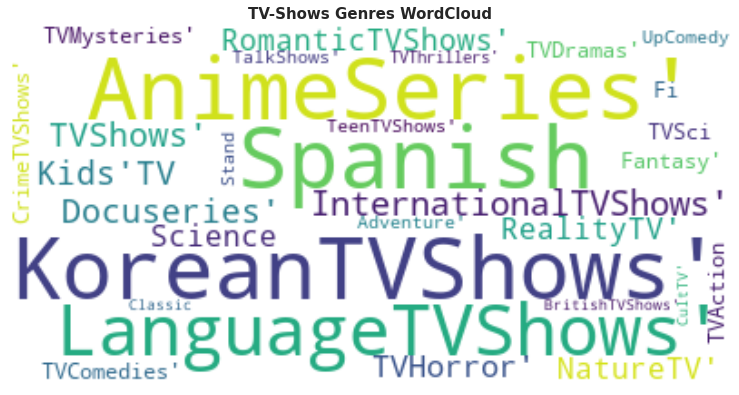

In [76]:
text = list(set(gen))

wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(str(text))
plt.rcParams['figure.figsize'] = (13, 13)

plt.title('TV-Shows Genres WordCloud', fontweight = 'bold', fontsize=15)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()